# Pymaceuticals Inc.
---

### Analysis

- we are examining a data set which looks at tumor growth in mice, comparing outcomes based on physical characteristics of the subject and the tumor.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
studydata_df = pd.merge(study_results, mouse_metadata,
                        how='outer', on='Mouse ID')

# Display the data table for preview
studydata_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
studydata_df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
studydata_df['Mouse ID'].count()

1893

In [4]:
studydata_df['Mouse ID'].value_counts()

Mouse ID
g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: count, Length: 249, dtype: int64

In [5]:
dup_id = studydata_df.loc[studydata_df.duplicated(subset=['Mouse ID','Timepoint'])]
dup_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
print(dup_id, sep='\n')

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
861     g989          0           45.000000                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
867     g989         15           53.442020                 0     Propriva   
869     g989         20           54.657650                 1     Propriva   

        Sex  Age_months  Weight (g)  
861  Female          21          26  
863  Female          21          26  
865  Female          21          26  
867  Female          21          26  
869  Female          21          26  


In [7]:
studydata_df.loc[studydata_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
FullDup_id = studydata_df.loc[studydata_df['Mouse ID']=="g989"]
FullDup_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_id = studydata_df.drop_duplicates(subset='Mouse ID', keep ='last')
clean_id.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
10,f932,0,45.000000,0,Ketapril,Male,15,29
18,g107,35,71.905117,0,Ketapril,Female,2,29
21,a457,10,49.783419,0,Ketapril,Female,11,30
30,c819,40,62.175705,1,Ketapril,Male,21,25


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_id['Mouse ID'].nunique()

249

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_reg = studydata_df.groupby(studydata_df["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = drug_reg["Tumor Volume (mm3)"].mean()
median = drug_reg["Tumor Volume (mm3)"].median()
variance = drug_reg["Tumor Volume (mm3)"].var()
std = drug_reg["Tumor Volume (mm3)"].std()
sem = drug_reg["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_reg_summary = pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median,
                                 "Tumor Volume Variance":variance, "Tumor Volume Standard Deviation":std,
                                 "Tumor Volume Standard Error":sem})

drug_reg_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = studydata_df.groupby(studydata_df["Drug Regimen"])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'Total Mice for each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Mice ID / Timepoints'>

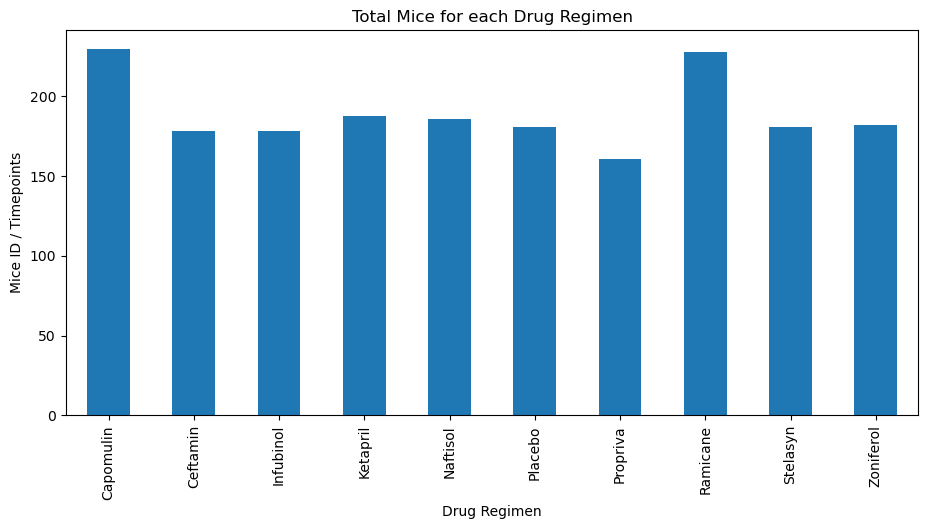

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart = studydata_df.groupby(studydata_df["Drug Regimen"]).count()['Mouse ID'].rename('Mice Count')

plt.xlabel('Drug Regimen')
plt.ylabel('Mice ID / Timepoints')
plt.title('Total Mice for each Drug Regimen')

bar_chart.plot.bar(title='Total Mice for each Drug Regimen', y='# of Mice',figsize=(11,5))

<function matplotlib.pyplot.show(close=None, block=None)>

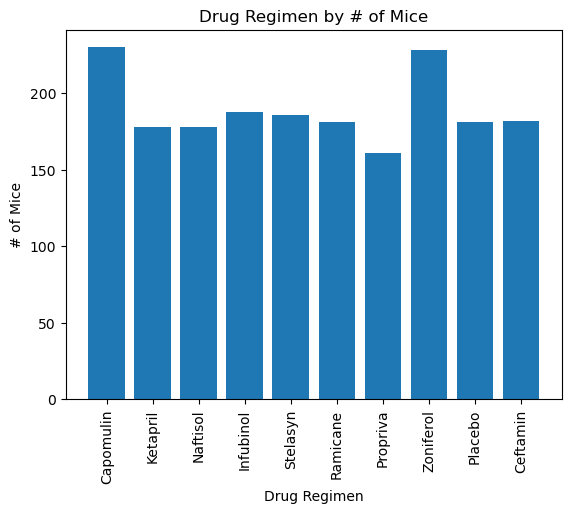

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Drugs = studydata_df['Drug Regimen'].unique()

#define chart variables
x_axis = Drugs
y_axis = studydata_df.groupby(['Drug Regimen']).count()['Mouse ID']
tick_labels = x_axis
plt.xlabel('Drug Regimen')
plt.ylabel('# of Mice')
plt.title('Drug Regimen by # of Mice')
plt.bar(x_axis, y_axis)
plt.xticks(tick_labels, rotation=90)
plt.show

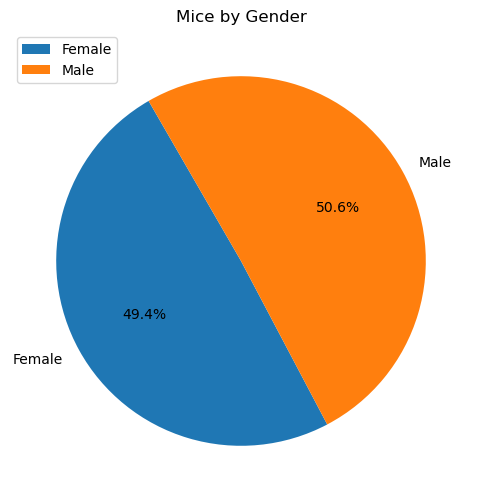

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = studydata_df.groupby(['Sex']).count()
gender_chart = gender.plot.pie(startangle=120, y='Mouse ID', title="Mice by Gender", autopct="%1.1f%%", figsize=(14,6))
gender_chart.legend(loc="upper left")
gender_chart.set_ylabel("")
plt.show()

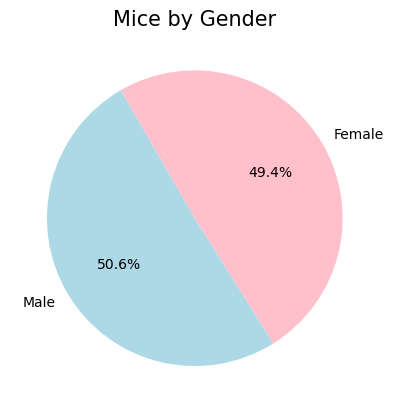

<Figure size 2000x700 with 0 Axes>

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Male", "Female"] 
breakdown = [50.6, 49.4]
colors = ['lightblue', 'pink']
title = ['Mice by Gender']

plt.pie(breakdown, labels=sex, colors=colors, autopct="%1.1f%%", startangle=120,)
plt.title('Mice by Gender',fontsize=15,)
plt.figure(figsize=(20,7))

plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_id.groupby(['Mouse ID'])["Timepoint"].max()

In [18]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
studydata2_df =pd.merge(greatest_timepoint, clean_id, on=("Mouse ID","Timepoint"))
studydata2_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
cap_nums = []
ram_nums = []
inf_nums = []
cef_nums = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in studydata2_df.iterrows():
    if row ["Drug Regimen"]==four_drugs[0]:
        cap_nums.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"]==four_drugs[1]:
        ram_nums.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"]==four_drugs[2]:
        inf_nums.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"]==four_drugs[3]:
        cef_nums.append(row['Tumor Volume (mm3)'])

#DF
four_drugs_df = pd.DataFrame({four_drugs[0]:cap_nums, 
                              four_drugs[1]:ram_nums, 
                              four_drugs[2]:inf_nums,
                              four_drugs[3]:cef_nums})

four_drugs_df.head()   

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078


In [20]:
studydata2_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [21]:
four_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
vol_cap = []
vol_ram = []
vol_inf = []
vol_cef = []

for i in range(len(studydata2_df)-1):
    if studydata2_df.loc[i, "Drug Regimen"] == "Capomulin":
        vol_cap.append(studydata2_df.loc[i, "Tumor Volume (mm3)"])
    if studydata2_df.loc[i, "Drug Regimen"] == "Ramicane":
        vol_ram.append(studydata2_df.loc[i, "Tumor Volume (mm3)"])
    if studydata2_df.loc[i, "Drug Regimen"] == "Infubinol":
        vol_inf.append(studydata2_df.loc[i, "Tumor Volume (mm3)"])
    if studydata2_df.loc[i, "Drug Regimen"] == "Ceftamin":
        vol_cef.append(studydata2_df.loc[i, "Tumor Volume (mm3)"])

In [22]:
# Put four tumor vol lists into a list for for loop
tumor_vol = [vol_cap, vol_ram, vol_inf, vol_cef]

In [23]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outlier_list = []
for i in range(len(tumor_vol)):
    quartiles = pd.Series(tumor_vol[i]).quantile([.25,.5,.75])
    lower = quartiles [.25]
    upper = quartiles[.75]
    qr = upper-lower
    print(f"\n{four_drugs[i]}:")
    print(f"Lower quartile tumor volume is: {lower}.")
    print(f"Upper quartile tumor volume is: {upper}.")
    print(f"Interquartile tumor volume is: {qr}.")
    print(f"Median tumor volume is: {quartiles[.5]}.")
    lower_bound = lower - (1.5*qr)
    upper_bound = upper + (1.5*qr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
 
# Determine outliers using upper and lower bounds   
    for j in range(len(tumor_vol[i])):
        if (tumor_vol[i][j]< lower_bound) or (tumor_vol[i][j] > upper_bound):
            outlier = tumor_vol[i][j]
            outlier_list.append(outlier)
            print(f"outliers are {outlier_list}.")


Capomulin:
Lower quartile tumor volume is: 32.37735684.
Upper quartile tumor volume is: 40.1592203.
Interquartile tumor volume is: 7.781863460000004.
Median tumor volume is: 38.1251644.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane:
Lower quartile tumor volume is: 31.56046955.
Upper quartile tumor volume is: 40.65900627.
Interquartile tumor volume is: 9.098536719999998.
Median tumor volume is: 36.56165229.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol:
Lower quartile tumor volume is: 54.04860769.
Upper quartile tumor volume is: 65.52574285.
Interquartile tumor volume is: 11.477135160000003.
Median tumor volume is: 60.16518046.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
outliers are [36.3213458].

Ceftamin:
Lower quartile tumor volume is: 48.72207785.
Upper quartile tumor volume is: 64.29983003.
Interquartile tumo

<function matplotlib.pyplot.show(close=None, block=None)>

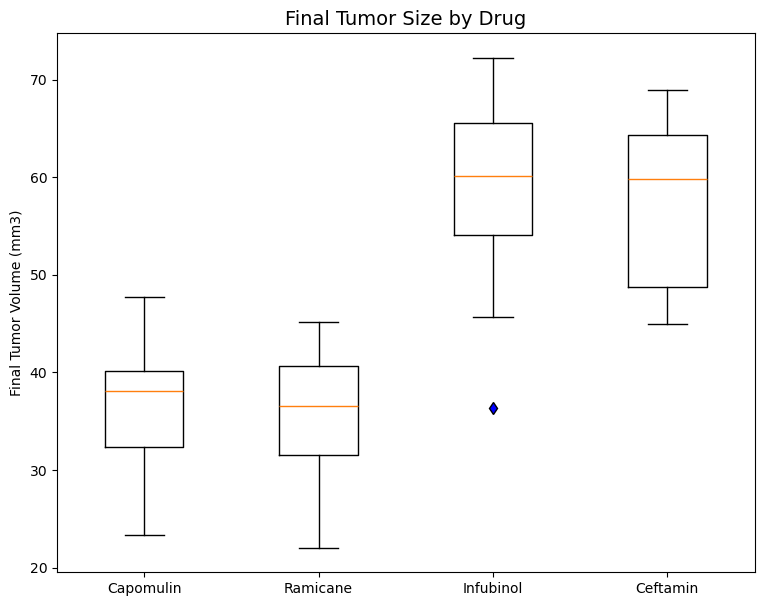

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax = plt.subplots(figsize=(9,7))
dot = dict(markerfacecolor = 'b', marker = 'd')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.boxplot(tumor_vol, flierprops = dot)
ax.set_title('Final Tumor Size by Drug', fontsize = 14)
ax.set_xticklabels(four_drugs)
plt.show

## Line and Scatter Plots

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
studydata2_df.loc[studydata2_df['Drug Regimen'] == 'Capomulin'].head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
19,b128,45,38.982878,2,Capomulin,Female,9,22
24,b742,45,38.939633,0,Capomulin,Male,7,21
61,f966,20,30.485985,0,Capomulin,Male,16,17
64,g288,45,37.074024,1,Capomulin,Male,3,19
66,g316,45,40.159220,2,Capomulin,Female,22,22


In [26]:
b742_id = studydata_df.loc[studydata_df['Mouse ID']=='b742']
b742_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1701,b742,0,45.000000,0,Capomulin,Male,7,21
1702,b742,5,41.534097,0,Capomulin,Male,7,21
1703,b742,10,41.999228,0,Capomulin,Male,7,21
1704,b742,15,39.524843,0,Capomulin,Male,7,21
1705,b742,20,37.950355,0,Capomulin,Male,7,21
1706,b742,25,38.617684,0,Capomulin,Male,7,21
1707,b742,30,39.167949,0,Capomulin,Male,7,21
1708,b742,35,39.847576,0,Capomulin,Male,7,21
1709,b742,40,38.255627,0,Capomulin,Male,7,21
1710,b742,45,38.939633,0,Capomulin,Male,7,21


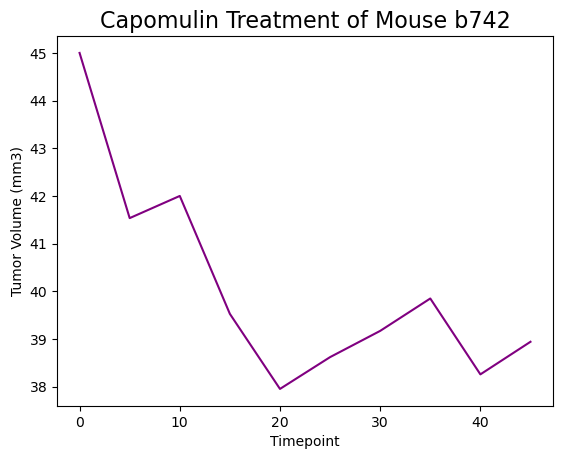

In [27]:
plt.plot(b742_id['Timepoint'],b742_id['Tumor Volume (mm3)'],color = 'purple')
plt.title('Capomulin Treatment of Mouse b742', fontsize = 16)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df = studydata_df.loc[studydata_df['Drug Regimen']=='Capomulin'].groupby('Mouse ID')
avg_vol_cap = cap_df['Tumor Volume (mm3)'].mean()

In [29]:
weight = cap_df['Weight (g)'].unique()

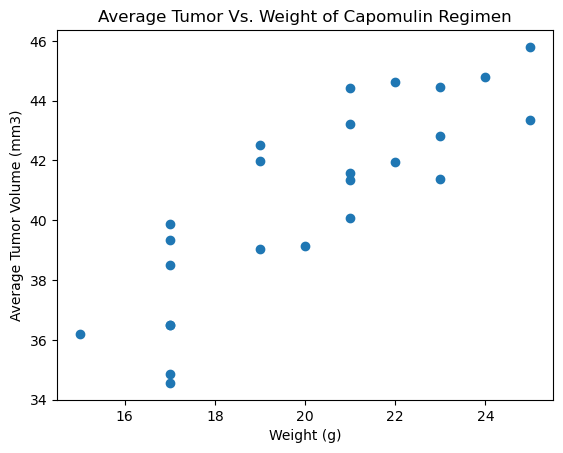

In [30]:
plt.scatter(weight,avg_vol_cap)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Vs. Weight of Capomulin Regimen')
plt.show()

## Correlation and Regression

In [31]:
# Calculate the correlation coefficient and a linear regression model 
print(f"The correlation coefficient between the average tumor volume and the weight of the mouse is {(st.pearsonr(avg_vol_cap,weight)[0])}")


The correlation coefficient between the average tumor volume and the weight of the mouse is [0.84116671]


In [51]:
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = weight.astype(float)
correlation = st.pearsonr(weight, avg_vol_cap)
x_values = weight
y_values = avg_vol_cap
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

In [50]:
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue(Correlation):{rvalue}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

print(line_eq)

slope:0.9544396890241049
intercept:21.552160532685008
rvalue(Correlation):0.8419363424694721
stderr:0.12754359033201323
y = 0.95x + 21.55


The r-squared is: 0.7088568047708723


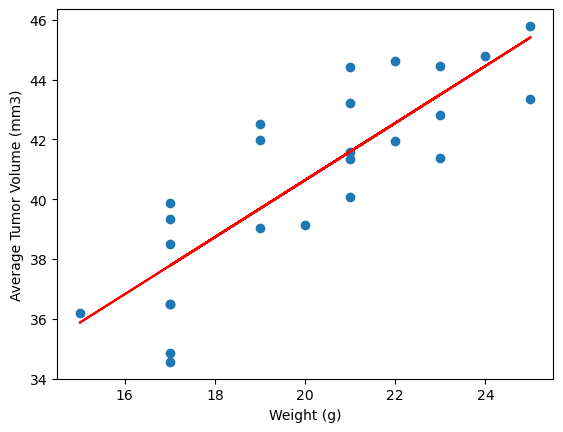

In [53]:
# Plot the different factors in a scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()